In [4]:
import numpy as np
import tensorflow as tf 
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
%matplotlib inline

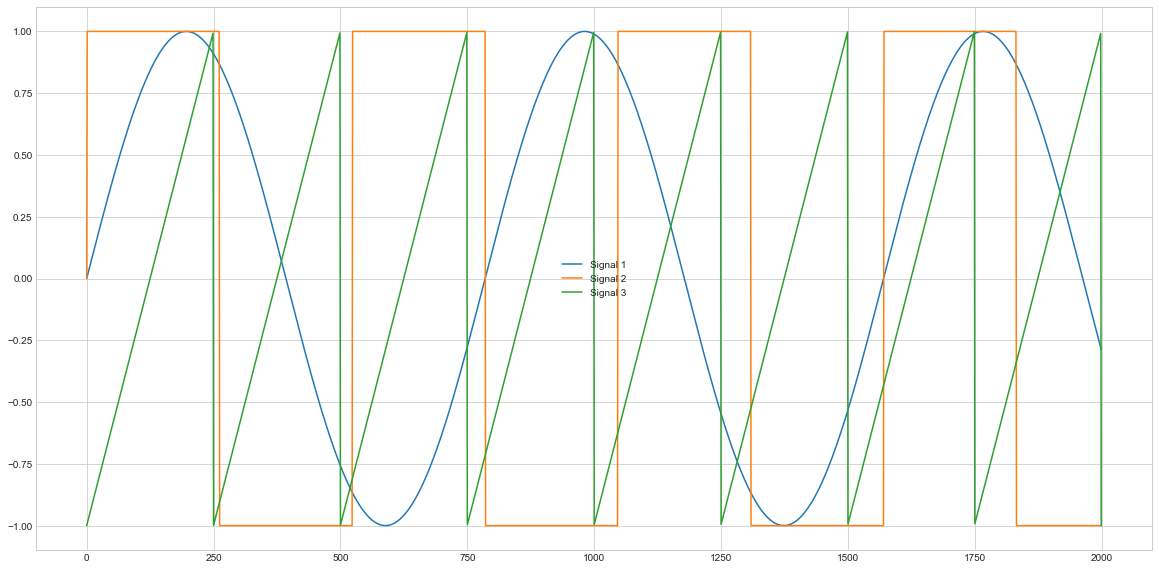

In [26]:
# ICA using Sklearn http://scikit-learn.org/stable/auto_examples/decomposition/plot_ica_blind_source_separation.html#sphx-glr-auto-examples-decomposition-plot-ica-blind-source-separation-py
from scipy import signal
from sklearn.decomposition import FastICA, PCA
# Generate sample data
np.random.seed(0)
n_samples = 2000
time = np.linspace(0, 8, n_samples)

s1 = np.sin(2 * time)  # Signal 1 : sinusoidal signal
s2 = np.sign(np.sin(3 * time))  # Signal 2 : square signal
s3 = signal.sawtooth(2 * np.pi * time)  # Signal 3: saw tooth signal

S = np.c_[s1, s2, s3]
S += 0.2 * np.random.normal(size=S.shape)  # Add noise

S /= S.std(axis=0)  # Standardize data
# Mix data
A = np.array([[1, 1, 1], [0.5, 2, 1.0], [1.5, 1.0, 2.0]])  # Mixing matrix
X = np.dot(S, A.T)  # Generate observations

fig = plt.figure(figsize=(20, 10))
plt.plot(s1,label='Signal 1')
plt.plot(s2,label='Signal 2')
plt.plot(s3,label='Signal 3')
plt.legend()
plt.show()

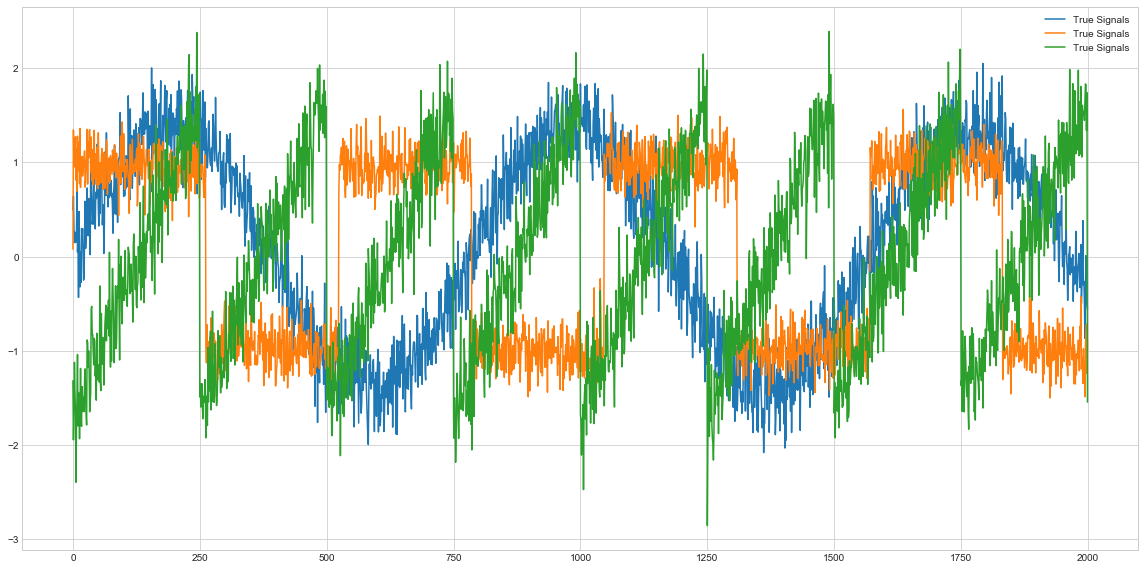

In [28]:
fig = plt.figure(figsize=(20, 10))
plt.plot(S,label='True Signals')
plt.legend()
plt.show()

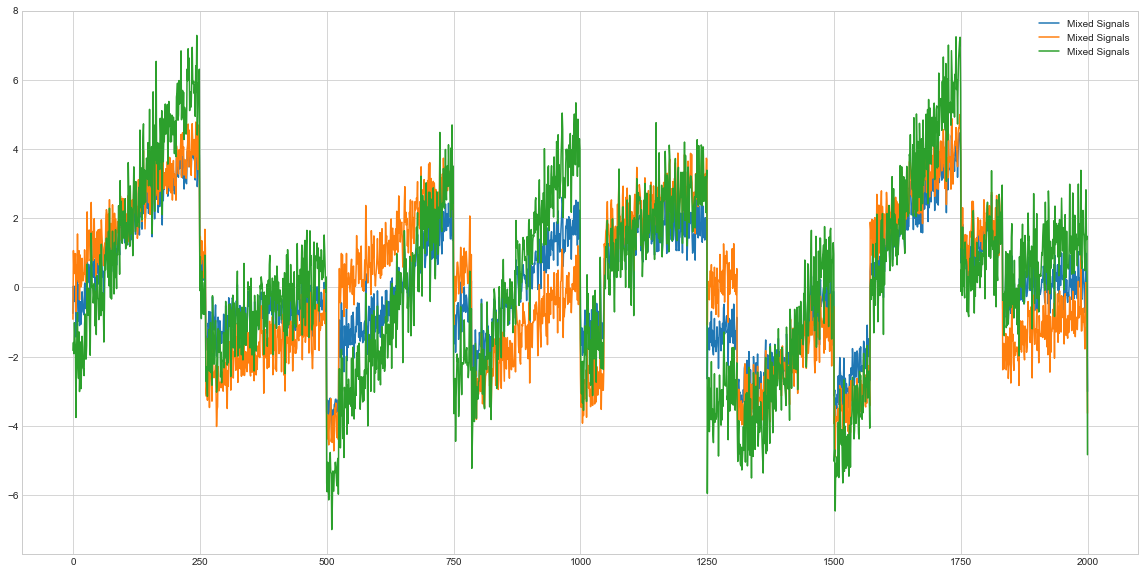

In [31]:
fig = plt.figure(figsize=(20, 10))
plt.plot(X,label='Mixed Signals')
plt.legend()
plt.show()

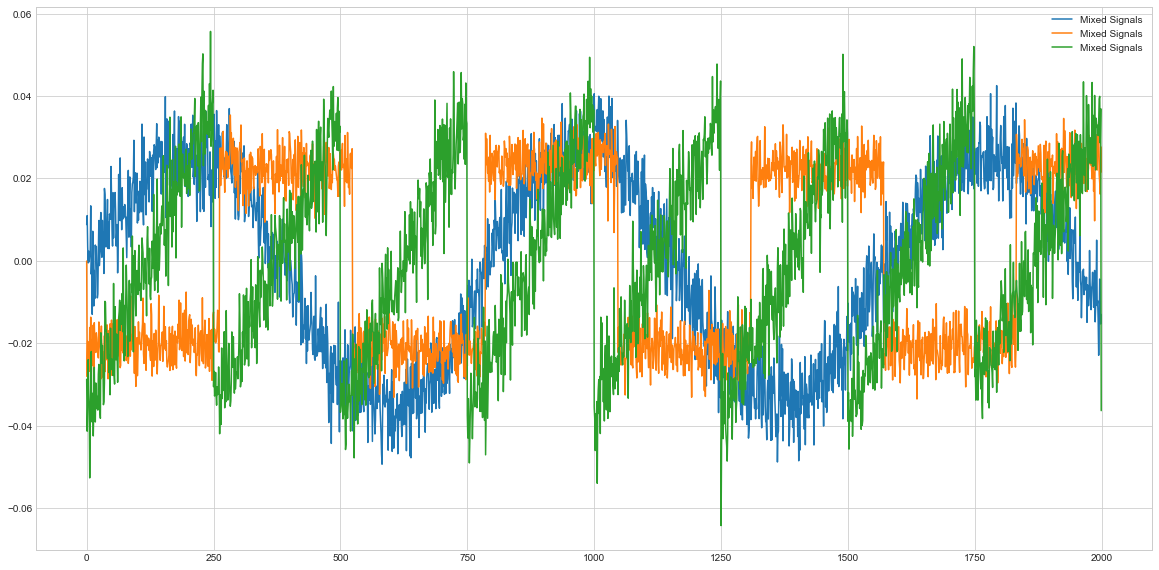

In [37]:
# Compute ICA
ica = FastICA(n_components=3)
S_ = ica.fit_transform(X)  # Reconstruct signals
A_ = ica.mixing_  # Get estimated mixing matr
fig = plt.figure(figsize=(20, 10))
plt.plot(S_,label='Mixed Signals')
plt.legend()
plt.show()

# The colors have changed but the signlas are there

In [75]:
import scipy
from numpy import dot

# 1. Remove the Mean from the data
X_mean = X - np.expand_dims(np.mean(X,axis=1),1)
print(X_mean.shape)

# 2. Calculated the Covarience

w, v = np.linalg.eig(np.cov(X_mean.T))
print(w.shape)
print(v.shape)


# X_w = sqrtm(pinv(D))*E’*X;
X_w =  dot(X_mean,dot(scipy.linalg.sqrtm(np.linalg.pinv(v)),w))
print(X_w.shape)

temp = np.su


(2000, 3)
(3,)
(3, 3)
(2000,)
